# WELCOME TO THE NOTEBOOK
---

Importing Modules

In [1]:
import pandas as pd 

Loading the data

In [3]:
json_data = pd.read_json('movies_dataset.json')
json_data.head(3)

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8


Check the dataframe shape (#rows and #columns)

In [4]:
json_data.shape

(5043, 14)

Let's check the data types of the columns

In [5]:
json_data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [8]:
json_data["color"]

0       Color
1       Color
2       Color
3       Color
4         NaN
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [11]:
json_data.drop(columns=['movie_imdb_link', 'num_critic_for_reviews', 'genres'], inplace=True)

Let's check the shape again

In [13]:
json_data.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [18]:
json_data.title_year = json_data.title_year.astype("Int64")

Let's check the dataframe again

In [19]:
json_data.head(3)

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Renaming some columns: 
- changing `gross` to `movie_income`

In [20]:
rename_dict  = {"gross": "movie_income", "language":"Language"}
json_data.rename(columns=rename_dict, inplace=True)
json_data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


Exercise: Rename the `budget` column to `movie_budget`

In [21]:
rename_dict  = {"budget": "movie_budget"}
json_data.rename(columns=rename_dict, inplace=True)
json_data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


In [22]:
json_data.head(3)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8


Text(0.5, 1.0, 'Movie Duration Histogram')

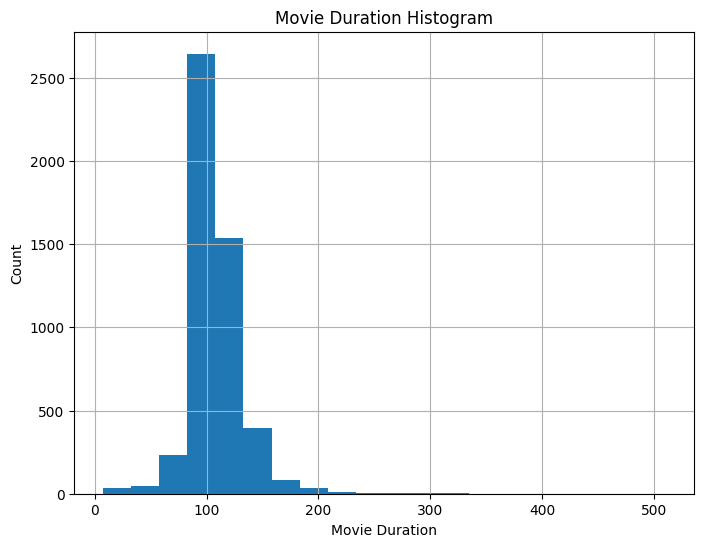

In [31]:
ax = json_data.duration.hist(bins=20, figsize=(8,6))
ax.set_xlabel("Movie Duration")
ax.set_ylabel("Count")
ax.set_title("Movie Duration Histogram")

Exercise: Create a hitogram to see the distribution of `imdb_score` column

Text(0, 0.5, 'Count')

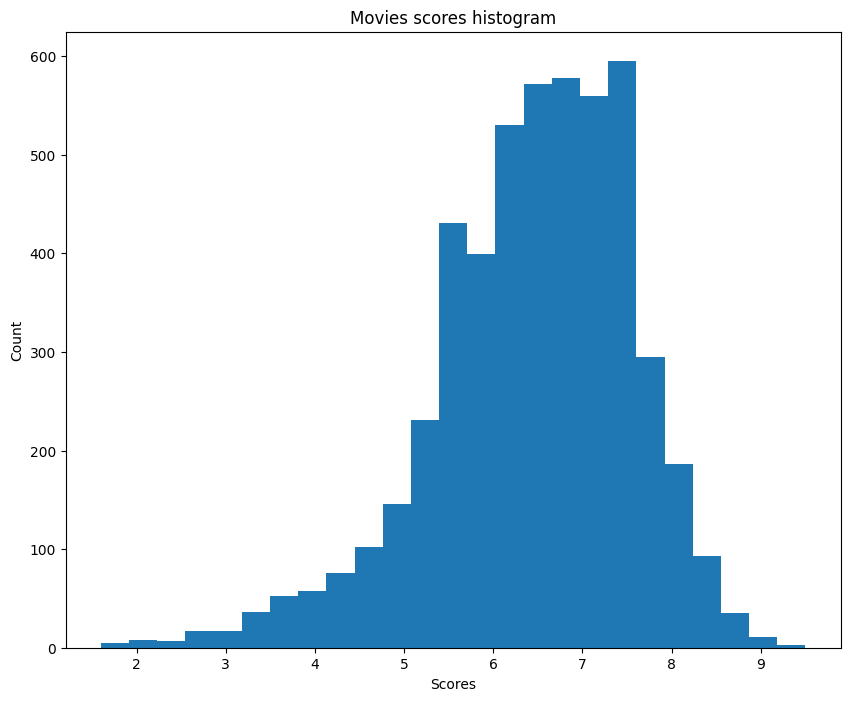

In [32]:
bar = json_data.imdb_score.hist(grid=False, figsize=(10,8), bins=25)
bar.set_title("Movies scores histogram")
bar.set_xlabel("Scores")
bar.set_ylabel("Count")

Let's check how many movies have the `imdb_score` less than `4`.

In [35]:
short_score = json_data[json_data['imdb_score'] < 4]
short_score.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
217,Color,Joel Schumacher,125.0,107285004.0,Michael Gough,Batman & Robin,English,USA,125000000.0,1997,3.7
267,Color,Jan de Bont,121.0,48068396.0,Jason Patric,Speed 2: Cruise Control,English,USA,160000000.0,1997,3.7


In [36]:
short_score.shape

(156, 11)

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

Text(0, 0.5, 'Count')

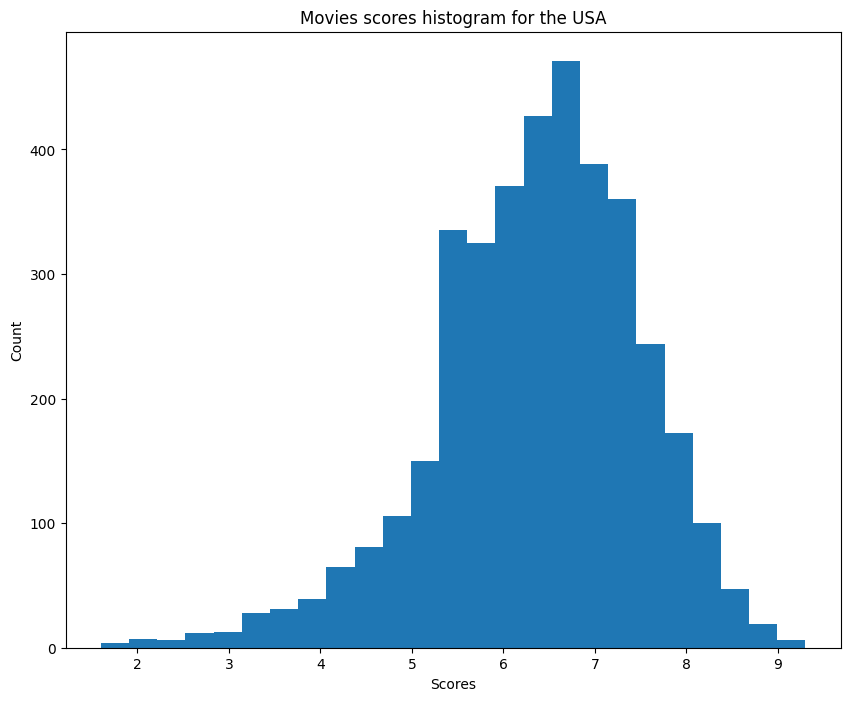

In [37]:
dataset = json_data[json_data['country'] == 'USA']
bar = dataset.imdb_score.hist(grid=False, figsize=(10,8), bins=25)
bar.set_title("Movies scores histogram for the USA")
bar.set_xlabel("Scores")
bar.set_ylabel("Count")

---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [43]:
count_per_year = json_data.groupby('title_year').size()
count_per_year.head(3)

title_year
1916    1
1920    1
1925    1
dtype: int64

Let's create a line chart to show the result

Text(0, 0.5, 'movies')

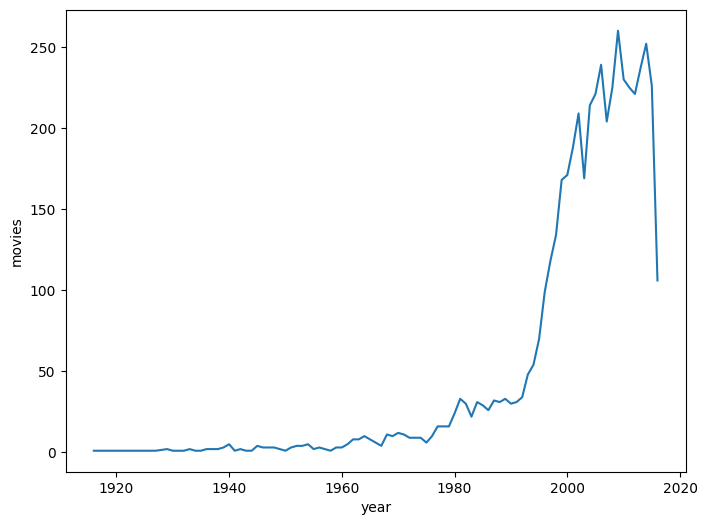

In [47]:
figure_ = count_per_year.plot(figsize=(8,6))
figure_.set_xlabel("year")
figure_.set_ylabel('movies')

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [50]:
avgscores = json_data.groupby('title_year')['imdb_score'].mean()
avgscores

title_year
1916    8.000000
1920    4.800000
1925    8.300000
1927    8.300000
1929    7.150000
          ...   
2012    6.266516
2013    6.369620
2014    6.228175
2015    6.033628
2016    6.399057
Name: imdb_score, Length: 91, dtype: float64

Let's Use a barchart to visualize the result

Text(0, 0.5, 'avg score')

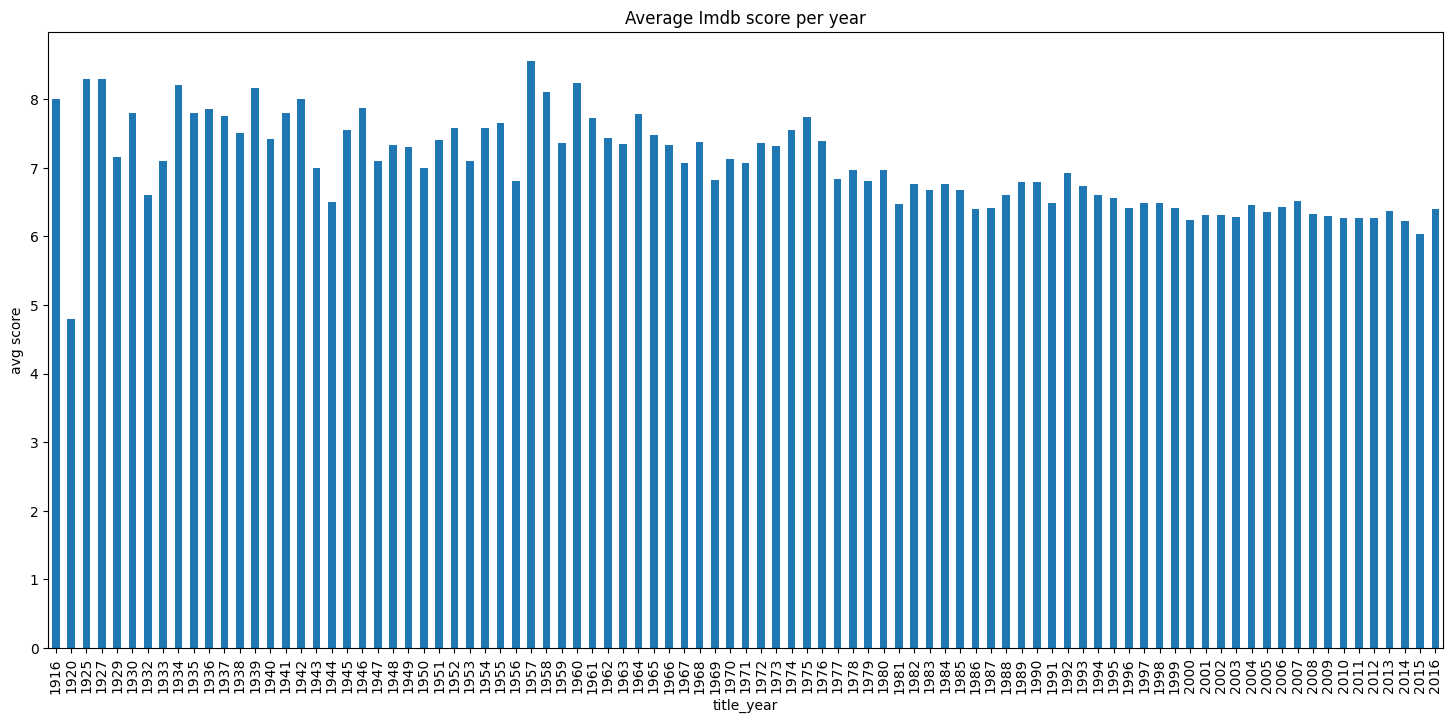

In [54]:
ax = avgscores.plot.bar(figsize=(18,8), title="Average Imdb score per year")
ax.set_ylabel('avg score')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

Maximum spent: 2006
Minimum spent: 1920


<Axes: xlabel='title_year'>

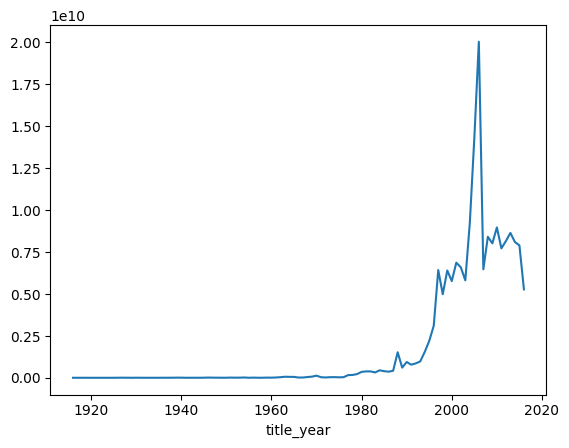

In [68]:
print("Maximum spent:", json_data.groupby('title_year')['movie_budget'].sum().idxmax())
print("Minimum spent:", json_data.groupby('title_year')['movie_budget'].sum().idxmin())
json_data.groupby('title_year')['movie_budget'].sum().plot()

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [ ]:
data_q4 = json_data[['imdb_score', 'movie_income']]

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
5,6.6,73058679.0
...,...,...
5034,6.3,70071.0
5035,6.9,2040920.0
5037,6.4,4584.0
5041,6.3,10443.0


Let's drop the rows with `non` values

In [74]:
data_q4.dropna(inplace=True)

C:\Users\miguelestradam36\AppData\Local\Temp\ipykernel_11320\2985372388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_q4.dropna(inplace=True)


Let's generate the correlation matrix

In [79]:
data_q4.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000
